<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/work_from_here/21dayrunningcorr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance --q

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  49 of 49 completed


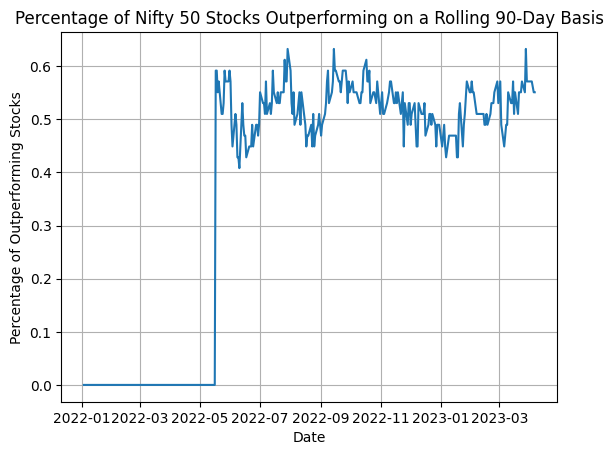

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Download Nifty 50 constituents
nifty_constituents = ['RELIANCE.NS', 'HDFCBANK.NS', 'INFY.NS', 'TCS.NS', 'ICICIBANK.NS', 'HDFC.NS', 'KOTAKBANK.NS',
                      'ITC.NS', 'SBIN.NS', 'ASIANPAINT.NS', 'HCLTECH.NS', 'BAJFINANCE.NS', 'LT.NS', 'MARUTI.NS',
                      'WIPRO.NS', 'AXISBANK.NS', 'ONGC.NS', 'SUNPHARMA.NS', 'BAJAJ-AUTO.NS', 'TATASTEEL.NS',
                      'COALINDIA.NS', 'M&M.NS', 'DRREDDY.NS', 'HINDUNILVR.NS', 'JSWSTEEL.NS', 'BHARTIARTL.NS',
                      'GRASIM.NS', 'ULTRACEMCO.NS', 'CIPLA.NS', 'NTPC.NS', 'POWERGRID.NS', 'TATAMOTORS.NS',
                      'HEROMOTOCO.NS', 'BAJAJFINSV.NS', 'TECHM.NS', 'IOC.NS', 'BPCL.NS', 'UPL.NS', 'EICHERMOT.NS',
                      'NESTLEIND.NS', 'BRITANNIA.NS', 'ADANIPORTS.NS', 'SHREECEM.NS', 'TATAPOWER.NS', 'ZEEL.NS',
                      'TITAN.NS', 'DIVISLAB.NS', 'INDUSINDBK.NS', 'GAIL.NS']

# Download Nifty 50 index data
nifty = yf.download('^NSEI', start='2022-01-01', end=datetime.date.today(), interval='1d')

# Download Nifty 50 constituents data
stocks_data = yf.download(nifty_constituents, start='2022-01-01', end=datetime.date.today(), interval='1d')

# Calculate rolling 90-day returns for Nifty 50 and its constituents
nifty['rolling_return'] = nifty['Adj Close'].pct_change(periods=90)
stocks_data = stocks_data['Adj Close'].pct_change(periods=90)

# Calculate the percentage of outperforming stocks on a rolling 90-day basis
outperformance = (stocks_data.gt(nifty['rolling_return'], axis=0)).mean(axis=1)

# Plot the results
plt.plot(outperformance)
plt.xlabel('Date')
plt.ylabel('Percentage of Outperforming Stocks')
plt.title('Percentage of Nifty 50 Stocks Outperforming on a Rolling 90-Day Basis')
plt.grid()
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  49 of 49 completed


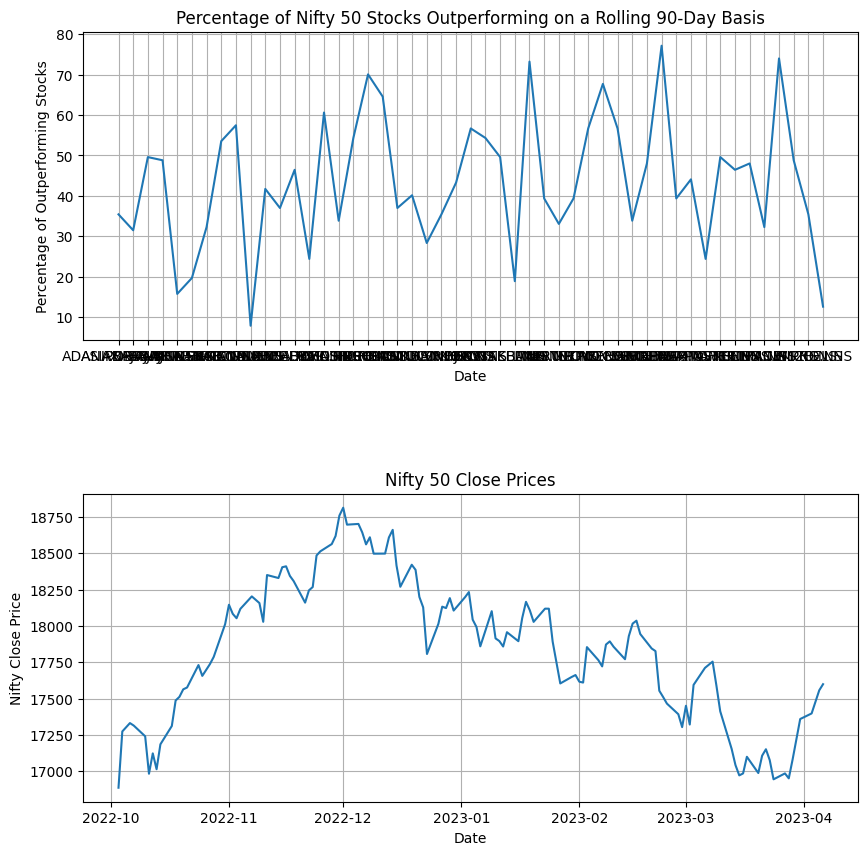

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import datetime

def get_outperformance_percentage(stock_returns, nifty_returns):
    outperforming_stocks = (stock_returns > nifty_returns)
    return outperforming_stocks.sum() / len(outperforming_stocks) * 100

# Download Nifty 50 constituents
nifty_constituents = ['RELIANCE.NS', 'HDFCBANK.NS', 'INFY.NS', 'TCS.NS', 'ICICIBANK.NS', 'HDFC.NS', 'KOTAKBANK.NS',
                      'ITC.NS', 'SBIN.NS', 'ASIANPAINT.NS', 'HCLTECH.NS', 'BAJFINANCE.NS', 'LT.NS', 'MARUTI.NS',
                      'WIPRO.NS', 'AXISBANK.NS', 'ONGC.NS', 'SUNPHARMA.NS', 'BAJAJ-AUTO.NS', 'TATASTEEL.NS',
                      'COALINDIA.NS', 'M&M.NS', 'DRREDDY.NS', 'HINDUNILVR.NS', 'JSWSTEEL.NS', 'BHARTIARTL.NS',
                      'GRASIM.NS', 'ULTRACEMCO.NS', 'CIPLA.NS', 'NTPC.NS', 'POWERGRID.NS', 'TATAMOTORS.NS',
                      'HEROMOTOCO.NS', 'BAJAJFINSV.NS', 'TECHM.NS', 'IOC.NS', 'BPCL.NS', 'UPL.NS', 'EICHERMOT.NS',
                      'NESTLEIND.NS', 'BRITANNIA.NS', 'ADANIPORTS.NS', 'SHREECEM.NS', 'TATAPOWER.NS', 'ZEEL.NS',
                      'TITAN.NS', 'DIVISLAB.NS', 'INDUSINDBK.NS', 'GAIL.NS']

# Download Nifty 50 index data
nifty = yf.download('^NSEI', start='2022-10-01', end=datetime.date.today(), interval='1d')

# Download Nifty 50 constituents data
stocks_data = yf.download(nifty_constituents, start='2022-10-01', end=datetime.date.today(), interval='1d')

# Calculate rolling 90-day returns for Nifty 50 and its constituents
nifty['rolling_return'] = nifty['Adj Close'].pct_change(periods=21)
stocks_data = stocks_data['Adj Close'].pct_change(periods=21)

# Calculate the percentage of outperforming stocks on a rolling 90-day basis
outperformance = stocks_data.apply(lambda x: get_outperformance_percentage(x, nifty['rolling_return']), axis=0)

# Plot the results
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5)

# Plot outperformance percentage
ax1.plot(outperformance)
ax1.set_xlabel('Date')
ax1.set_ylabel('Percentage of Outperforming Stocks')
ax1.set_title('Percentage of Nifty 50 Stocks Outperforming on a Rolling 90-Day Basis')
ax1.grid()

# Plot Nifty close prices
ax2.plot(nifty['Close'])
ax2.set_xlabel('Date')
ax2.set_ylabel('Nifty Close Price')
ax2.set_title('Nifty 50 Close Prices')
ax2.grid()

plt.show()


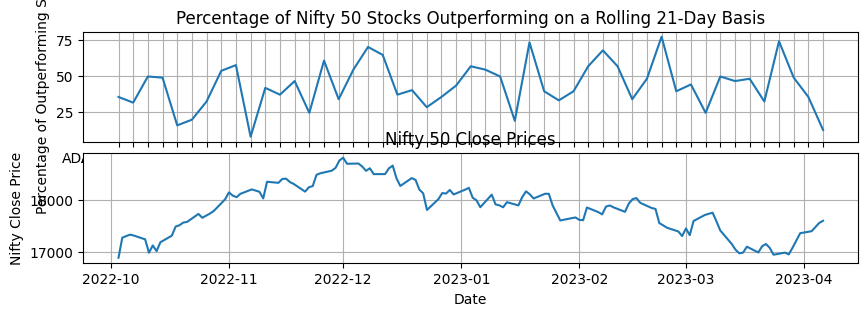

In [4]:
# Plot the results
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 3))
fig.subplots_adjust(hspace=0.1)

# Plot outperformance percentage
ax1.plot(outperformance)
ax1.set_xlabel('Date')
ax1.set_ylabel('Percentage of Outperforming Stocks')
ax1.set_title('Percentage of Nifty 50 Stocks Outperforming on a Rolling 21-Day Basis')
ax1.grid()

# Plot Nifty close prices
ax2.plot(nifty['Close'])
ax2.set_xlabel('Date')
ax2.set_ylabel('Nifty Close Price')
ax2.set_title('Nifty 50 Close Prices')
ax2.grid()

plt.show()
